<a href="https://colab.research.google.com/github/prasannaad/ASL753-Atmospheric-Aerosols/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1.1. Particle size distribution basics**

a. Complete this table by computing the following quantities: ΔNi/ΔDpi, ΔNi/NΔDpi,
ΔSi/ΔDpi, ΔSi/SΔDpi, ΔMi/ΔDpi, ΔMi/MΔDpi,ΔNi/ΔlogDpi, ΔNi/NΔlogDpi, ΔSi/ΔlogDpi,
ΔSi/SΔlogDpi, ΔMi/ΔlogDpi, ΔMi/MΔlogDpi, where M = particle mass.

b. Plot ΔNi/ΔlogDpi, ΔSi/ΔlogDpi, ΔMi/ΔlogDpi as histograms.

c. Determine the geometric mean diameter and geometric standard deviation of the
lognormal distribution to which these data adhere and plot the continuous distributions on
the three plots from part (b).

d. For this lognormal distribution, develop an analytical expression that relates fined by the
mass median diameter to the count median diameter (i.e., your result from part (c)) as a
function of the parameters that define this distribution. What is the mass median diameter
of this particle size distribution?

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

dataset = { "size_interval": ["0.1-0.2", "0.2-0.4", "0.40-0.70","0.70-1.00", "1.0-2.0","2.0-4.0", "4.0-7.0", "7.0-10", "10-20"],
            "geometric mean of size interval": [0.1414, 0.2828, 0.5292, 0.8367, 1.414, 2.828, 5.292,8.367,14.14],
            "Number of particles in the size interval": [50,460,1055,980,1705,680,102,10,2]
          }

df =  pd.DataFrame(data=dataset)
x =  df['size_interval']
y = df['geometric mean of size interval']
z = df['Number of particles in the size interval']

In [ ]:
dDpi = []
dlogDpi = np.log10(y)
CDpi = []



for i in x:
  k = i.split("-")
  dDpi.append((float(k[1]) - float(k[0])))
  CDpi.append((float(k[1]) - float(k[0]))/(np.log10(float(k[1])) - np.log10(float(k[0]))))

print(dDpi)
dlogDpi
CDpi


[0.1, 0.2, 0.29999999999999993, 0.30000000000000004, 1.0, 2.0, 3.0, 3.0, 10.0]


[0.3321928094887362,
 0.6643856189774726,
 1.2343746241446751,
 1.9367088707438649,
 3.321928094887362,
 6.643856189774724,
 12.343746241446754,
 19.367088707438647,
 33.21928094887362]

In [ ]:
surfaceArea = np.pi * (y**2)
mass = np.pi * ((y**3)/(6)) * (1.5/(10 ** 6))
mass
surfaceArea

0      0.062813
1      0.251252
2      0.879811
3      2.199325
4      6.281288
5     25.125151
6     87.981132
7    219.932500
8    628.128779
Name: geometric mean of size interval, dtype: float64

In [ ]:
df['dN/dDpi'] = z/dDpi
df['dS/dDpi'] = df['dN/dDpi'] * surfaceArea
df['dM/dDpi'] = df['dN/dDpi'] * mass
df['dN/dlogDpi'] = df['dN/dDpi'] * CDpi
df['dS/dlogDpi'] = df['dS/dDpi'] * CDpi
df['dM/dlogDpi'] = df['dM/dDpi'] * CDpi

df

,size_interval,geometric mean of size interval,Number of particles in the size interval,dN/dDpi,dS/dDpi,dM/dDpi,dN/dlogDpi,dS/dlogDpi,dM/dlogDpi
0,0.1-0.2,0.1414,50,500.000000,31.406439,0.000001,166.096405,10.432993,3.688063e-07
1,0.2-0.4,0.2828,460,2300.000000,577.878476,0.000041,1528.086924,383.934149,2.714414e-05
2,0.40-0.70,0.5292,1055,3516.666667,3094.003129,0.000409,4340.884095,3819.158950,5.052747e-04
3,0.70-1.00,0.8367,980,3266.666667,7184.461662,0.001503,6326.582311,13914.210633,2.910505e-03
4,1.0-2.0,1.4140,1705,1705.000000,10709.595674,0.003786,5663.887402,35576.506754,1.257630e-02
5,2.0-4.0,2.8280,680,340.000000,8542.551388,0.006040,2258.911105,56755.482915,4.012613e-02
6,4.0-7.0,5.2920,102,34.000000,2991.358476,0.003958,419.687372,36924.569944,4.885121e-02
7,7.0-10,8.3670,10,3.333333,733.108333,0.001533,64.556962,14198.174115,2.969903e-02
8,10-20,14.1400,2,0.200000,125.625756,0.000444,6.643856,4173.197273,1.475225e-02


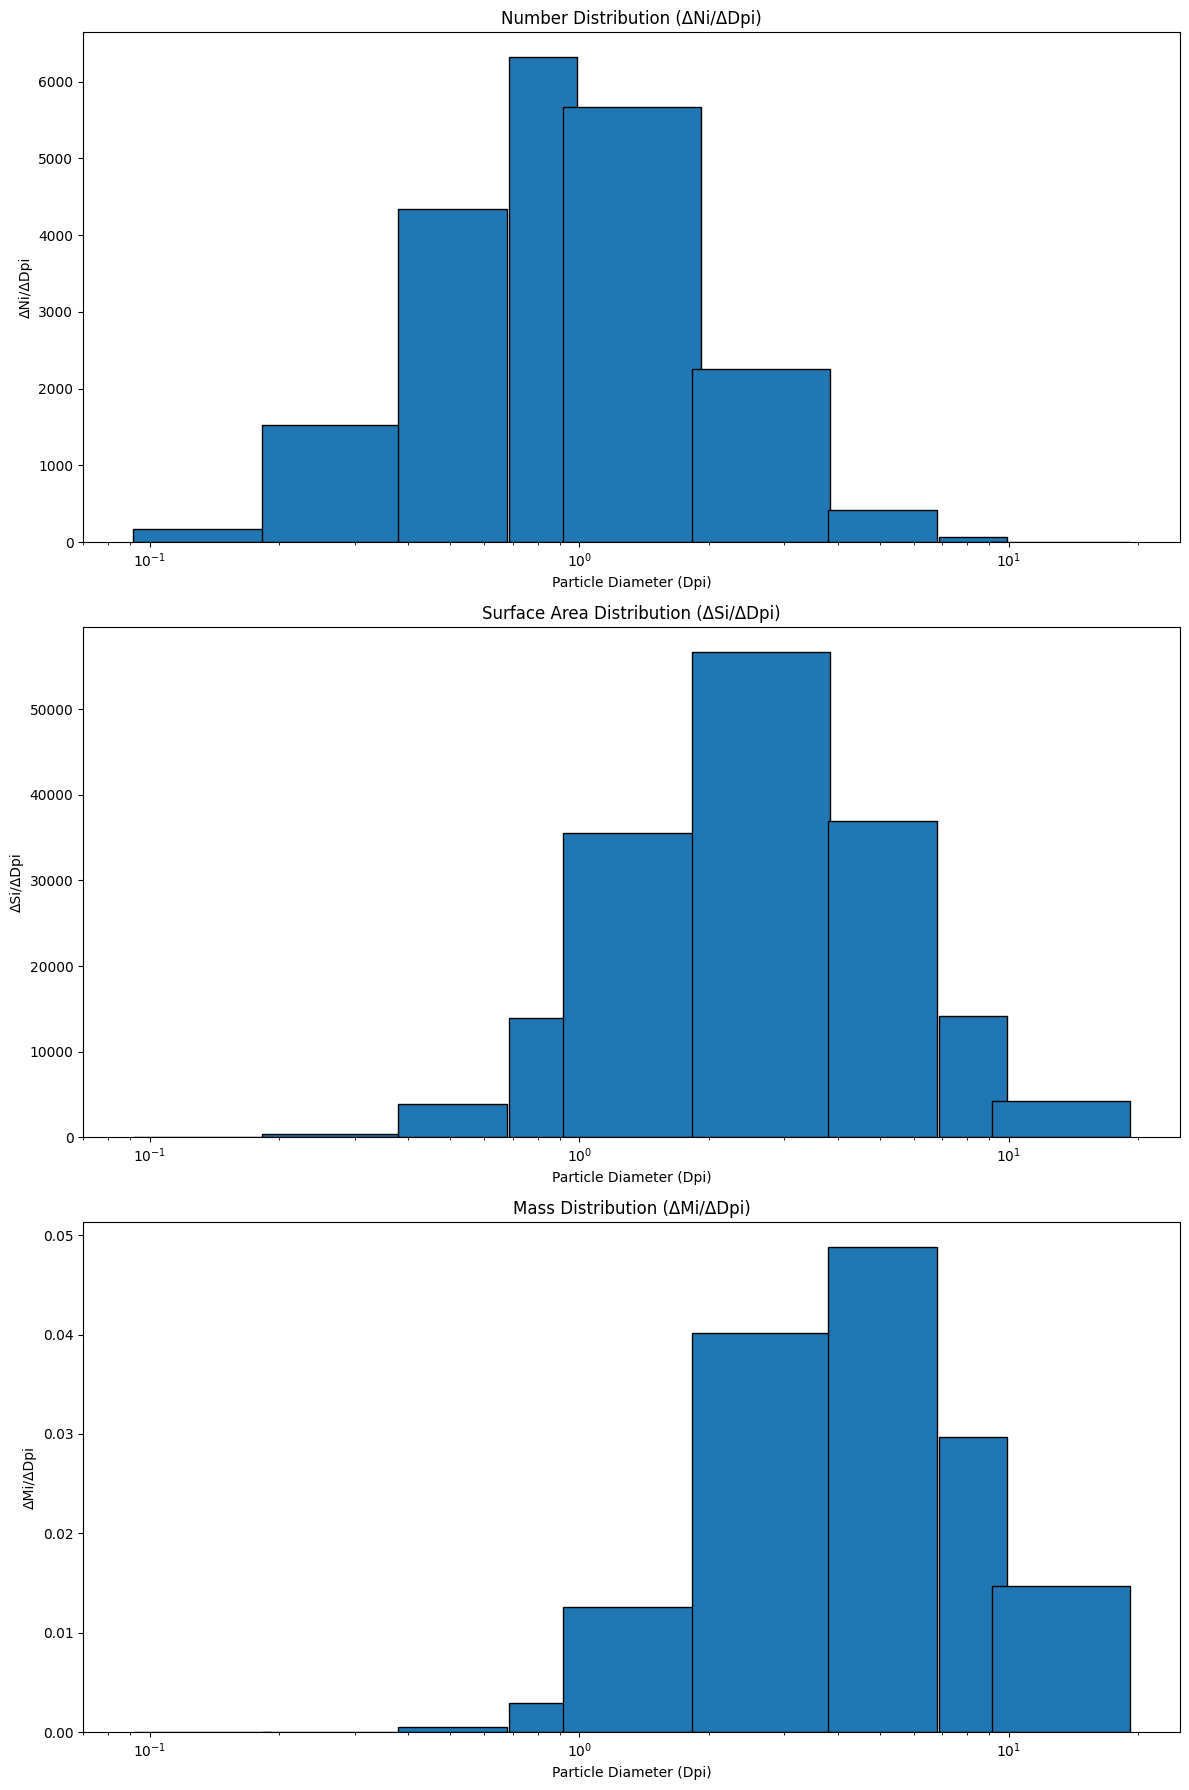

In [ ]:
# Setting up the plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for ΔNi/ΔDpi
axes[0].bar(y, df['dN/dlogDpi'], width=dDpi, align='center', edgecolor='black')
axes[0].set_xscale('log')


axes[0].set_title('Number Distribution (ΔNi/ΔDpi)')
axes[0].set_xlabel('Particle Diameter (Dpi)')
axes[0].set_ylabel('ΔNi/ΔDpi')

# Plot for ΔSi/ΔDpi
axes[1].bar(y, df['dS/dlogDpi'], width=dDpi, align='center', edgecolor='black')
axes[1].set_xscale('log')
axes[1].set_title('Surface Area Distribution (ΔSi/ΔDpi)')
axes[1].set_xlabel('Particle Diameter (Dpi)')
axes[1].set_ylabel('ΔSi/ΔDpi')

# Plot for ΔMi/ΔDpi
axes[2].bar(y, df['dM/dlogDpi'], width=dDpi, align='center', edgecolor='black')
axes[2].set_xscale('log')
axes[2].set_title('Mass Distribution (ΔMi/ΔDpi)')
axes[2].set_xlabel('Particle Diameter (Dpi)')
axes[2].set_ylabel('ΔMi/ΔDpi')

plt.tight_layout()
plt.show()

In [ ]:
 # Weighted mean and standard deviation of ln(Dp), weighted by Ni
weighted_mean_ln_Dp = np.sum((np.log(y) * z)) / np.sum(z)
weighted_std_ln_Dp = np.sqrt(np.sum(z * (np.log(y) - weighted_mean_ln_Dp) ** 2) / np.sum(z))

# Geometric mean diameter (Dg) and geometric standard deviation (σg)
Dg = np.exp(weighted_mean_ln_Dp)
σg = np.exp(weighted_std_ln_Dp)

Dg, σg

(0.9939008275122861, 2.068661657996001)

-0.04019466178797618 0.4307223635318043
0.35019705801373824 0.0065070028461966375
1.033992380723381 0.004343811642295015


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


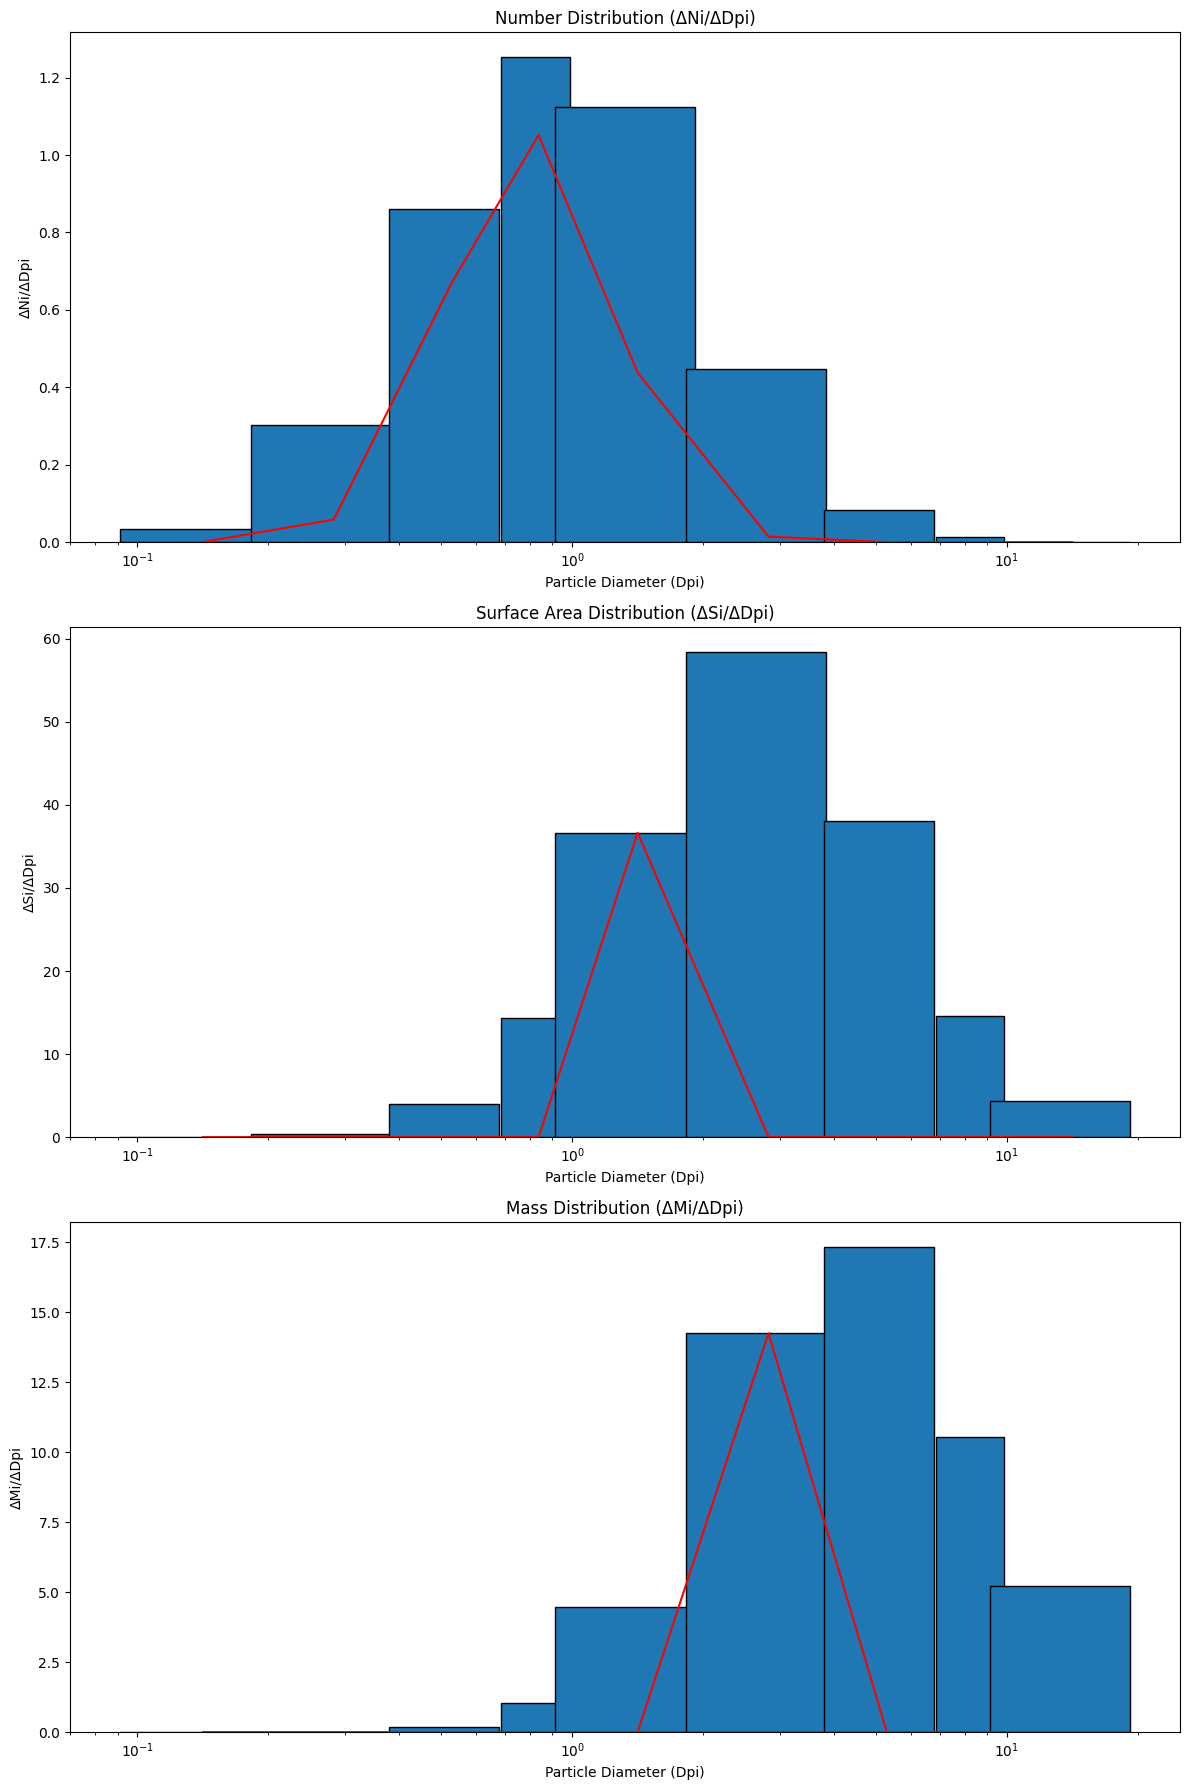

In [ ]:
from scipy.optimize import curve_fit

# Define lognormal PDF as function of x, mu, and sigma
def lognorm_fit(g, mu, sigma):
    c = (1/(sigma*g*np.sqrt(2*np.pi))) * np.exp(-1* ((np.log(g) - mu)**2/(2*sigma**2)))
    return c

(mu,sigma), _ = curve_fit(lognorm_fit, xdata=y, ydata=df['dN/dlogDpi']/z.sum())
print(mu, sigma)

dn = lognorm_fit(y, mu, sigma)

(mu1,sigma1), _ = curve_fit(lognorm_fit, xdata=y, ydata=df['dS/dlogDpi']/surfaceArea.sum())
print(mu1, sigma1)

ds = lognorm_fit(y, mu1, sigma1)

(mu2,sigma2), _ = curve_fit(lognorm_fit, xdata=y, ydata=df['dM/dlogDpi']/mass.sum())
print(mu2, sigma2)

dm = lognorm_fit(y, mu2, sigma2)

# Setting up the plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for ΔNi/ΔDpi
axes[0].bar(y, (df['dN/dlogDpi']/z.sum()), width=dDpi, align='center', edgecolor='black')
axes[0].plot(y,dn,color='red')
axes[0].set_xscale('log')


axes[0].set_title('Number Distribution (ΔNi/ΔDpi)')
axes[0].set_xlabel('Particle Diameter (Dpi)')
axes[0].set_ylabel('ΔNi/ΔDpi')

# Plot for ΔSi/ΔDpi
axes[1].bar(y, df['dS/dlogDpi']/surfaceArea.sum(), width=dDpi, align='center', edgecolor='black')
axes[1].plot(y,ds,color='red')
axes[1].set_xscale('log')
axes[1].set_title('Surface Area Distribution (ΔSi/ΔDpi)')
axes[1].set_xlabel('Particle Diameter (Dpi)')
axes[1].set_ylabel('ΔSi/ΔDpi')

# Plot for ΔMi/ΔDpi
axes[2].bar(y, df['dM/dlogDpi']/mass.sum(), width=dDpi, align='center', edgecolor='black')
axes[2].plot(y,dm,color='red')
axes[2].set_xscale('log')
axes[2].set_title('Mass Distribution (ΔMi/ΔDpi)')
axes[2].set_xlabel('Particle Diameter (Dpi)')
axes[2].set_ylabel('ΔMi/ΔDpi')

plt.tight_layout()
plt.show()

**1.2. More particle size distribution basics**

Consider the archetypal “urban” particle size distribution reported by Seinfeld and Pandis in Table 8.3, represented in that table as a sum of three lognormal distributions. Assume that the particle density for this PSD is 1.5 g cm−3
. Using a trapezoidal integration scheme, answer the following questions.

a. Generate plots of dN/dlog(Dp) and dM/dlog(Dp) for this particle size distribution.

b. Let’s consider particle number. What is the total number count for this distribution? What
fraction of the particle number count is in the ultrafine mode (Dp < 100 nm)?

c. Compute PM2.5 and PM10 for this distribution in units of μg m−3. What fraction of the
PM2.5 mass is contributed by particles in the following size ranges: ultrafine mode, 0.1–1
μm, and Dp > 1 μm?

In [ ]:
pip install opcsim

In [ ]:
# Make imports
import opcsim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set mathtext to display equations without italics
plt.rcParams.update({'mathtext.default': 'regular'})

<Axes: xlabel='$D_p \\; [\\mu m]$', ylabel='$dM/dlogD_p \\; [\\mu g m^{-3}]$'>

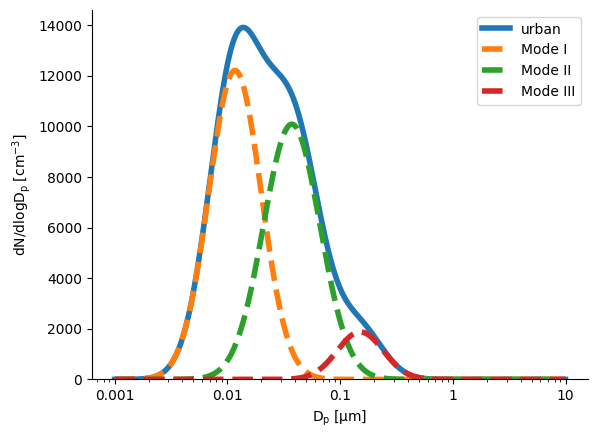

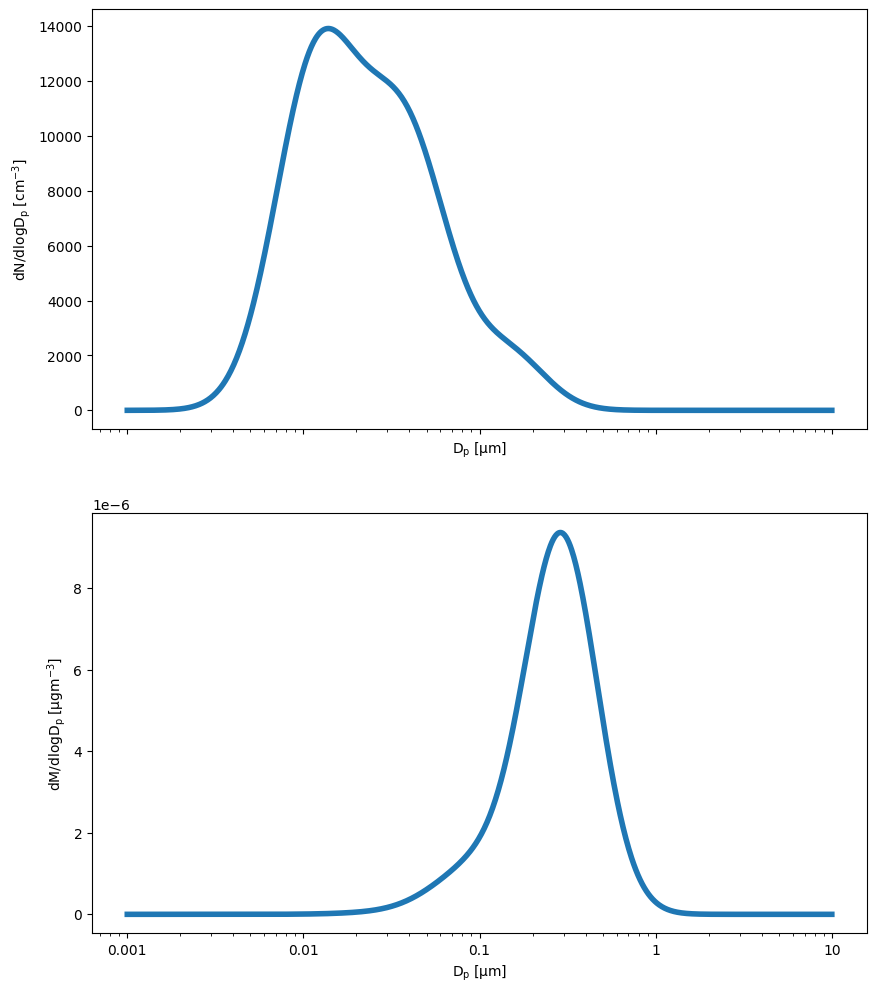

In [ ]:
urban = opcsim.AerosolDistribution("Urban")

# Individually add each mode
urban.add_mode(7100, 0.0117, 10**0.232, "Mode I")
urban.add_mode(6320, 0.0373, 10**0.25, "Mode II")
urban.add_mode(960, 0.151, 10**0.204, "Mode III")

urban = opcsim.load_distribution("Urban")


ax = opcsim.plots.pdfplot(urban, with_modes=True)

ax.legend(loc='best')

# Set the y-lim to start at 0
ax.set_ylim(0, None)

# Remove the right and top spines
sns.despine();


fig, ax = plt.subplots(2, figsize=(10,12), sharex=True)

opcsim.plots.pdfplot(urban, weight='number', ax=ax[0])
opcsim.plots.pdfplot(urban, weight='mass', ax=ax[1])

In [ ]:
#Total Particle Numbers
urban.cdf(dmax=100)


14380.0

In [ ]:
#Total Particle Numbers < 100nm
urban.cdf(dmax=0.1)

13328.419829607277

In [ ]:
#PM2.5
urban.cdf(dmax=2.5, weight='mass', rho=1.5)


8.183035814297265

In [ ]:
#PM10.0
urban.cdf(dmax=10.0, weight='mass', rho=1.5)

8.183053233007413

In [ ]:
#mass contributed by particles ultrafine mode

urban.cdf(dmax=0.1, weight='mass', rho=1.5)


0.6757136639062831

In [ ]:
#mass contributed by particles ultrafine mode, 0.1–1

urban.cdf(dmin=0.1, dmax=1, weight='mass', rho=1.5)

7.476082823823661

In [ ]:
#mass contributed by particles Dp > 1 μm

urban.cdf(dmin=1, dmax=2.5, weight='mass', rho=1.5)



0.03123932656732088

The fraction contribution of the ultrafine particle in the mass of PM 2.5 mass is given by ultrafine mass/PM2.5 mass.
(0.6757136639062831/8.183035814297265)/100 = 8.25%


The fraction contribution of the 0.1um-1um particle in the mass of PM 2.5 mass is given by 0.1um-1um mass/PM2.5 mass.
(7.476082823823661/8.183035814297265)/100 = 91.36%


The fraction contribution of the Dp>1um particle in the mass of PM 2.5 mass is given by Dp>1um mass/PM2.5 mass.
(0.03123932656732088/8.183035814297265)/100 = 0.3817%









**1.4. Particle transport in the stratosphere**

To begin, confirm that you can correctly calculate the slip correction factor, settling velocity,
and diffusion coefficient for a 0.1 μm particle at standard conditions. See attached table.
Now, consider a position in the stratosphere, 50 km above the earth’s surface. The air
temperature is 271 K and the pressure is 0.8 mbar = 80 Pa. Compute the particle transport
properties indicated below. In carrying out your analysis, consider the possible effects of
altitude, temperature and pressure on gravitational acceleration, air viscosity, mean-free-path
of gas molecules, and air density.

a. What is the Brownian diffusivity of a 0.3 μm particle?

b. What is the gravitational settling velocity of a 0.3 μm particle? Assume unit density.

In [ ]:
import math
from math import exp

# Constants
k_B = 1.38e-23  # Boltzmann constant (J/K)
pi = math.pi

# Particle properties
d_p = 0.1e-6  # Particle diameter (m)
rho_p = 1000  # Particle density (kg/m^3)

# Standard conditions
T_0 = 298  # Temperature (K)
P_0 = 101325  # Pressure (Pa)
mu_0 = 1.81e-5  # Air viscosity at standard conditions (Pa*s)
lambda_0 = 68e-9  # Mean free path at standard conditions (m)

# Stratospheric conditions
T_strat = 271  # Temperature (K)
P_strat = 80  # Pressure (Pa)

R = 8.314  # Ideal gas constant (J/mol*K)

Kn = 1
mu =1
# Function to calculate air viscosity based on temperature
def viscosity_air(T):
   return mu_0 * (T_0 / T)**1.5  # Sutherland's law approximation

# Function to calculate mean free path based on pressure
def mean_free_path(P):
   return lambda_0 * (P_0 / P)

# Function to calculate Cunningham slip correction factor
def cunningham_factor(d_p, lambda_):
   Kn = 2 * lambda_ / d_p
   C = 1 + Kn * (1.257 + 0.4 * exp(-1.1 / Kn))
   return C

# Function to calculate settling velocity
def settling_velocity(d_p, rho_p, rho_air, mu, C):
   g = 9.81  # Gravitational acceleration
   v_s = (rho_p - rho_air) * g * d_p**2 / (18 * mu * C)
   return v_s

# Function to calculate diffusion coefficient
def diffusion_coefficient(T, d_p, lambda_):
   D = k_B * T / (3 * pi * mu * d_p) * (1 + 2.514 * Kn + 0.8 * exp(-0.55 / Kn))
   return D

# Calculations for standard conditions
mu_0 = viscosity_air(T_0)
lambda_0 = mean_free_path(P_0)
C_0 = cunningham_factor(d_p, lambda_0)
v_s_0 = settling_velocity(d_p, rho_p, 1.225, mu_0, C_0)
D_0 = diffusion_coefficient(T_0, d_p, lambda_0)

# Calculations for stratospheric conditions
mu_strat = viscosity_air(T_strat)
lambda_strat = mean_free_path(P_strat)
rho_air_strat = P_strat / (R * T_strat)  # Assuming ideal gas law
C_strat = cunningham_factor(d_p, lambda_strat)
v_s_strat = settling_velocity(d_p, rho_p, rho_air_strat, mu_strat, C_strat)
D_strat = diffusion_coefficient(T_strat, d_p, lambda_strat)

print("Standard:")
print("Slip correction factor:", C_0)
print("Settling velocity:", v_s_0, "m/s")
print("Diffusion coefficient:", D_0, "m^2/s")

print("\nStratospheric:")
print("Slip correction factor:", C_strat)
print("Settling velocity:", v_s_strat, "m/s")
print("Diffusion coefficient:", D_strat, "m^2/s")

Standard:
Slip correction factor: 2.951807664729337
Settling velocity: 1.0188201703585796e-07 m/s
Diffusion coefficient: 1.7346925718802113e-14 m^2/s

Stratospheric:
Slip correction factor: 2854.784065461529
Settling velocity: 9.146580962521005e-11 m/s
Diffusion coefficient: 1.577522439528649e-14 m^2/s


In [ ]:
import math

# Constants
k_B = 1.3806e-23  # Boltzmann constant (J/K)
pi = math.pi

# Particle diameter (in meters)
d_p = 0.3e-6

# Temperature (in Kelvin)
T = 298

# Viscosity of air (in Pa*s)
eta = 1.81e-5

# Calculate Brownian diffusivity
D_b = k_B * T / (3 * pi * eta * d_p)

# Print the result
print("Brownian diffusivity:", D_b, "m^2/s")

Brownian diffusivity: 8.039206347567325e-11 m^2/s


In [ ]:
import math

# Constants
g = 9.81  # Gravitational acceleration (m/s^2)
rho_p = 1000  # Particle density (kg/m^3, assuming unit density)
eta = 1.81e-5  # Air viscosity (Pa*s)
d_p = 0.3e-6  # Particle diameter (m)

# Calculate Reynolds number
Re = d_p**2 * rho_p * abs(g) / (18 * eta)

# Calculate drag coefficient (Stokes' regime for Re < 0.1)
if Re < 0.1:
    C_d = 24 / Re
else:
    # Use an empirical formula for higher Re (e.g., Schiller-Naumann)
    C_d = 18.58 + 0.64 / Re**0.5 + 0.34 / Re**1.5

# Calculate settling velocity
v_s = (2 * rho_p * d_p**2 * abs(g) * C_d) / (9 * eta)

# Print the result
print("Gravitational settling velocity:", v_s, "m/s")

Gravitational settling velocity: 95.99999999999999 m/s
